# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset.csv')
df

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,0,1,1,1,0,0,0,0,0,...,1,1,0,0,0,0,1,1,0,0
1,2,1,1,1,1,1,0,-1,1,0,...,1,1,0,0,-1,0,1,1,1,0
2,3,1,-1,1,1,1,0,0,0,0,...,1,1,1,0,1,0,1,-1,0,0
3,4,1,-1,1,1,1,0,0,0,1,...,1,1,0,0,1,0,1,0,1,0
4,5,1,-1,0,1,1,0,1,1,0,...,0,1,0,0,-1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,11-151,1,0,1,0,1,1,1,1,0,...,0,0,1,1,0,0,1,1,1,1
11051,11-15-1,0,1,1,0,0,0,1,0,0,...,0,1,1,1,1,1,1,0,1,0
11052,11-153,1,0,1,1,1,0,1,0,0,...,1,1,1,1,1,0,1,-1,1,0
11053,11-154,0,0,1,1,1,0,0,0,1,...,0,1,1,1,1,0,1,1,1,0


In [3]:
df = df.drop(columns=['index','having_IPhaving_IP_Address','URLURL_Length','Prefix_Suffix','SSLfinal_State','Statistical_report','Links_pointing_to_page','Google_Index','Page_Rank','web_traffic','DNSRecord','age_of_domain','Iframe','popUpWidnow','Favicon','port','HTTPS_token','Request_URL','URL_of_Anchor','Links_in_tags','Abnormal_URL','RightClick','Redirect','SFH','on_mouseover'])


In [4]:
df['Shortining_Service'].value_counts()


1    9611
0    1444
Name: Shortining_Service, dtype: int64

In [5]:
df['having_At_Symbol'].value_counts()

1    9400
0    1655
Name: having_At_Symbol, dtype: int64

In [6]:
df['double_slash_redirecting'].value_counts()

1    9626
0    1429
Name: double_slash_redirecting, dtype: int64

In [7]:
df['having_Sub_Domain'].value_counts()

 1    4070
-1    3622
 0    3363
Name: having_Sub_Domain, dtype: int64

In [8]:
df['Domain_registeration_length'].value_counts()

0    7389
1    3666
Name: Domain_registeration_length, dtype: int64

In [9]:
df['Submitting_to_email'].value_counts()

1    9041
0    2014
Name: Submitting_to_email, dtype: int64

In [10]:
dummy_var=['having_Sub_Domain']

In [11]:
df = pd.get_dummies(df, columns=dummy_var, drop_first=True)

In [12]:
df

,Shortining_Service,having_At_Symbol,double_slash_redirecting,Domain_registeration_length,Submitting_to_email,Result,having_Sub_Domain_0,having_Sub_Domain_1
0,1,1,0,0,0,0,1,0
1,1,1,1,0,1,0,0,0
2,1,1,1,0,0,0,1,0
3,1,1,1,1,1,0,1,0
4,0,1,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...
11050,1,0,1,0,0,1,0,1
11051,1,0,0,0,0,0,0,1
11052,1,1,1,0,1,0,0,1
11053,1,1,1,1,1,0,1,0


In [13]:
X = df.drop(['Result','having_Sub_Domain_1','having_Sub_Domain_0'], axis=1).values
y = df['Result'].values

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [16]:
scaler = StandardScaler()
X_train_tr = scaler.fit_transform(X_train)
X_test_tr = scaler.transform(X_test)


In [17]:
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred = logit.predict(X_test)

In [19]:
accuracy_score(y_pred, y_test)

0.6385672937771346

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


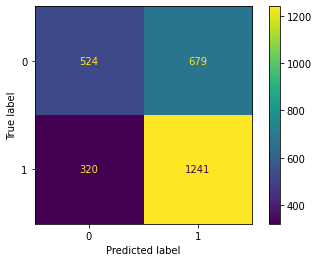

In [20]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logit, X_test, y_test)


In [21]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd

In [22]:
gaunb = GaussianNB()

In [23]:
gaunb = gaunb.fit(X_train, y_train)

In [24]:
y_pred = gaunb.predict(X_test)

In [25]:
accuracy_score(y_pred, y_test)

0.6110709117221418

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


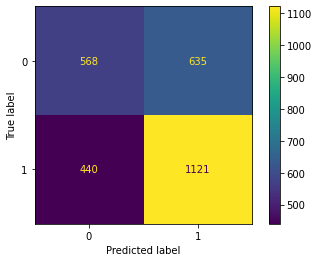

In [26]:
plot_confusion_matrix(gaunb, X_test, y_test)

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
y_pred = clf.predict(X_test)

In [30]:
accuracy_score(y_pred, y_test)

0.644356005788712

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


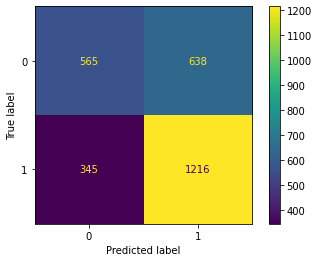

In [31]:
plot_confusion_matrix(clf, X_test, y_test)

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin
class UrlExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_new=[]
        for Url in X:
            x=np.zeros(5)
            if "bit.ly" in Url or "squirre.ls" in Url or "tinyurl.com" in Url:
                x[0]=1
            if "@" in Url:
                x[1]=1
            if "//" in Url:
                x[2]=1
            if len(Url)>15:
                x[3]=1
            if "mailto:" in Url:
                x[4]=1
            X_new.append(x)
        return np.array(X_new)
                

In [33]:
urlextractor = UrlExtractor()

In [34]:
urlextractor.transform(["www.google.com", "bit.ly/slido"])

array([[0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [35]:
from sklearn.pipeline import Pipeline

In [36]:
pipe=Pipeline(
    [
        ("UrlExtractor", UrlExtractor()),
        ("model", clf)
    ]
)


In [37]:
pipe.predict(["www.google.com", "bit.ly/slido"])

array([0, 0], dtype=int64)

In [38]:
import pickle
pickle.dump(pipe, open('nlp_pipe.pkl', 'wb'))